# Exploratory Data Analysis - Titanic Dataset

Introduction

On April 15, 1912, Titanic stroke an iceberg and more than 1500 died from 2224 passengers and crews. In this exploration, Titanic dataset with each row represents one person/passenger will be analyzed. Then, the columns describe passenger's attributes such as whether they are survived, their age, their economy class, their sex, their fare paid, number of their family (sibling/spouse/parent/children, their ticket, their cabin and their port embarkation.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data

df_titanic = pd.read_csv('titanic.csv')

In [3]:
# View Data

df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Data Information

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Checking whether tickets are unique? - No
len(df_titanic['Ticket'].unique())

681

In [6]:
# Checking Cabin Value

df_titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [7]:
# Checking Number of Siblings/Spouse

df_titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [8]:
# Checking Number of Parents/Children

df_titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

Understanding Data

Pclass : 1-Upper, 2-Middle, 3-Lower
Port of Embarkation: S - Southampton, C - Cherbourg, Q - Queenstown

New columns that will be add in this analysis
Age Cluster : 0 - 12 Child, 13 - 18 Teenagers, 18 - 25 Young Adult, 25 - 40 Adult, > 41 Elder
HasFamily : 1- yes (Parents, Children, Siblings/Spouse), 0- no
FamilyMembers : # SibSp (Sibling/Spouse) + # Parch (Parent Children) --> total family members

In [9]:
# Adding Family Information

df_titanic['FamilyMembers'] = df_titanic.SibSp + df_titanic.Parch
HasFamily = (df_titanic.FamilyMembers>0)*1
df_titanic['HasFamily'] = HasFamily

In [10]:
# Adding Age Cluster

age_range = [0,12,18,25,40,100]
age_cluster = ['Child','Teenager','Young Adult','Adult','Elder']
df_titanic['age_cluster']=pd.cut(df_titanic.Age, age_range, labels = age_cluster)

In [11]:
# View Table

df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyMembers,HasFamily,age_cluster
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,Young Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,1,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,Adult


# Analysis

Questions to explore in this analysis : what kind of passengers that tend to survive?

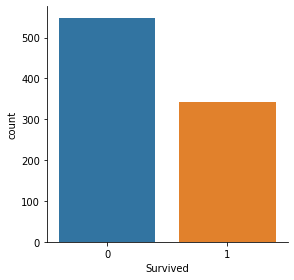

In [12]:
# Distribution of Survived

g = sns.catplot(x="Survived",
                data=df_titanic, kind="count",
                height=4, aspect=1)

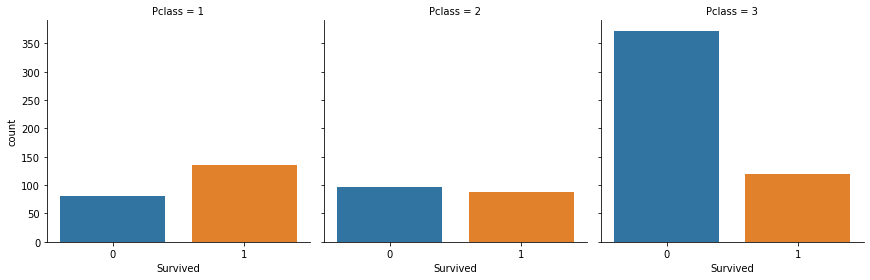

In [13]:
# Distribution of 'Pclass'

g = sns.catplot(x="Survived", col="Pclass",
                data=df_titanic, kind="count",
                height=4, aspect=1)

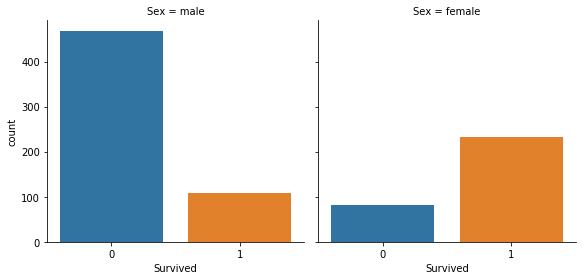

In [14]:
# Distribution of 'Sex'

g = sns.catplot(x="Survived", col="Sex",
                data=df_titanic, kind="count",
                height=4, aspect=1)

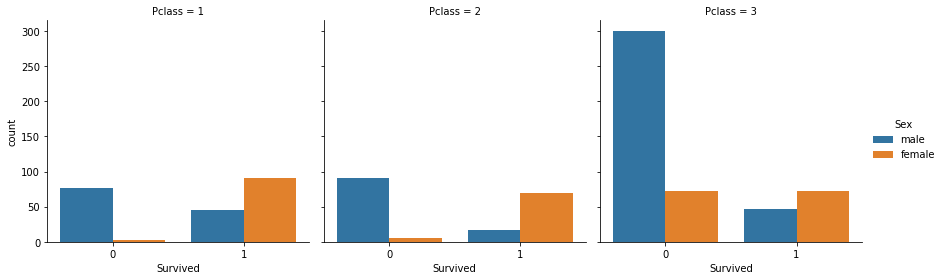

In [15]:
# Let's see Survived, Pclass, Gender

g = sns.catplot(x="Survived", col = 'Pclass', hue = 'Sex',
                data=df_titanic, kind="count",
                height=4, aspect=1)

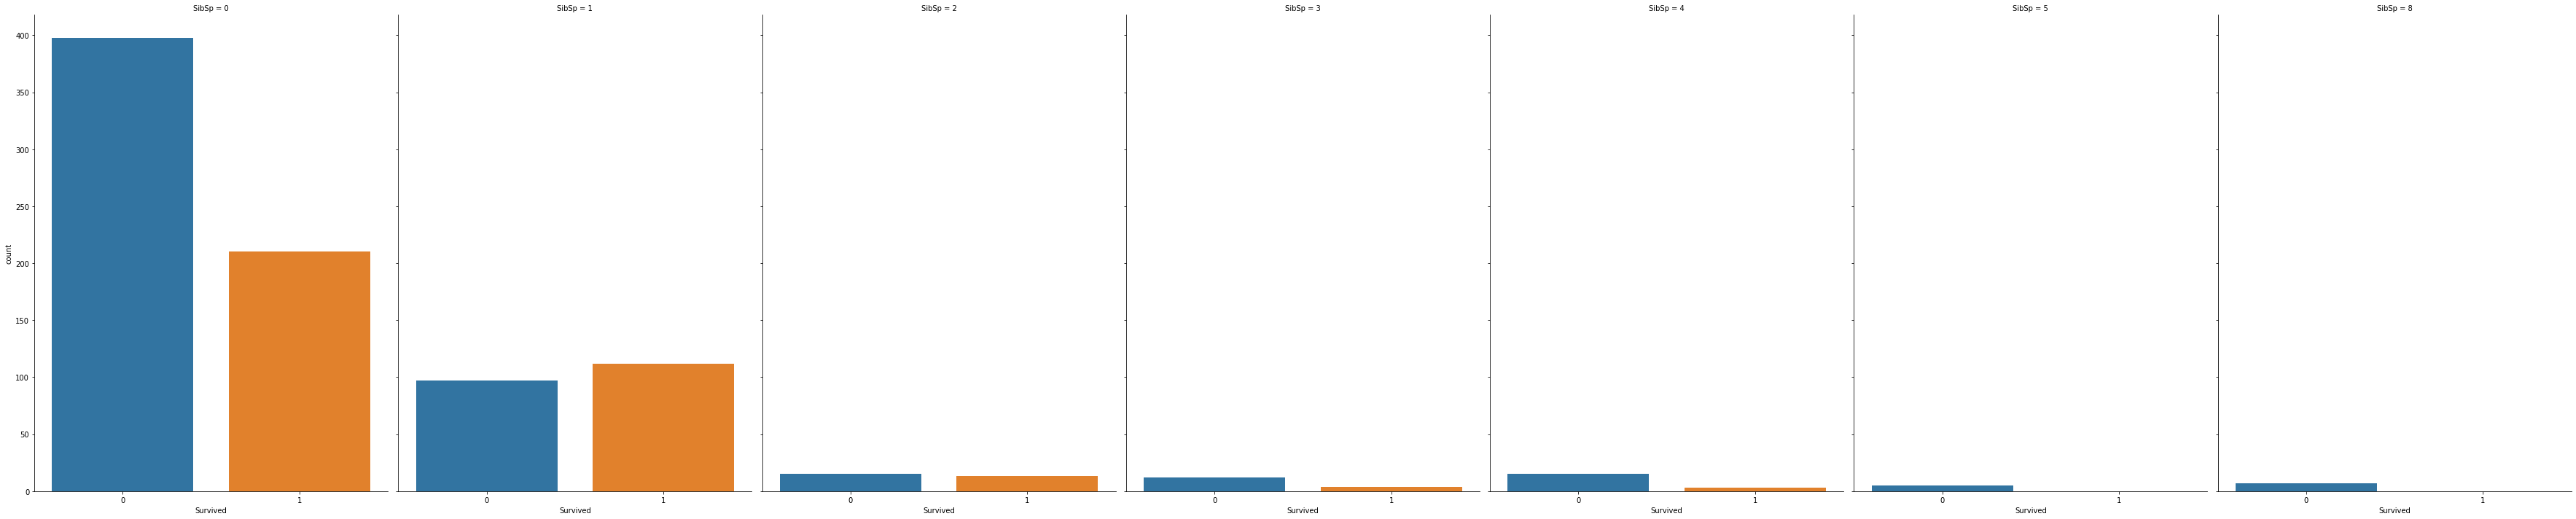

In [16]:
# Distribution of 'SibSp'

g = sns.catplot(x="Survived", col="SibSp",
                data=df_titanic, kind="count",
                height=10, aspect=0.7)

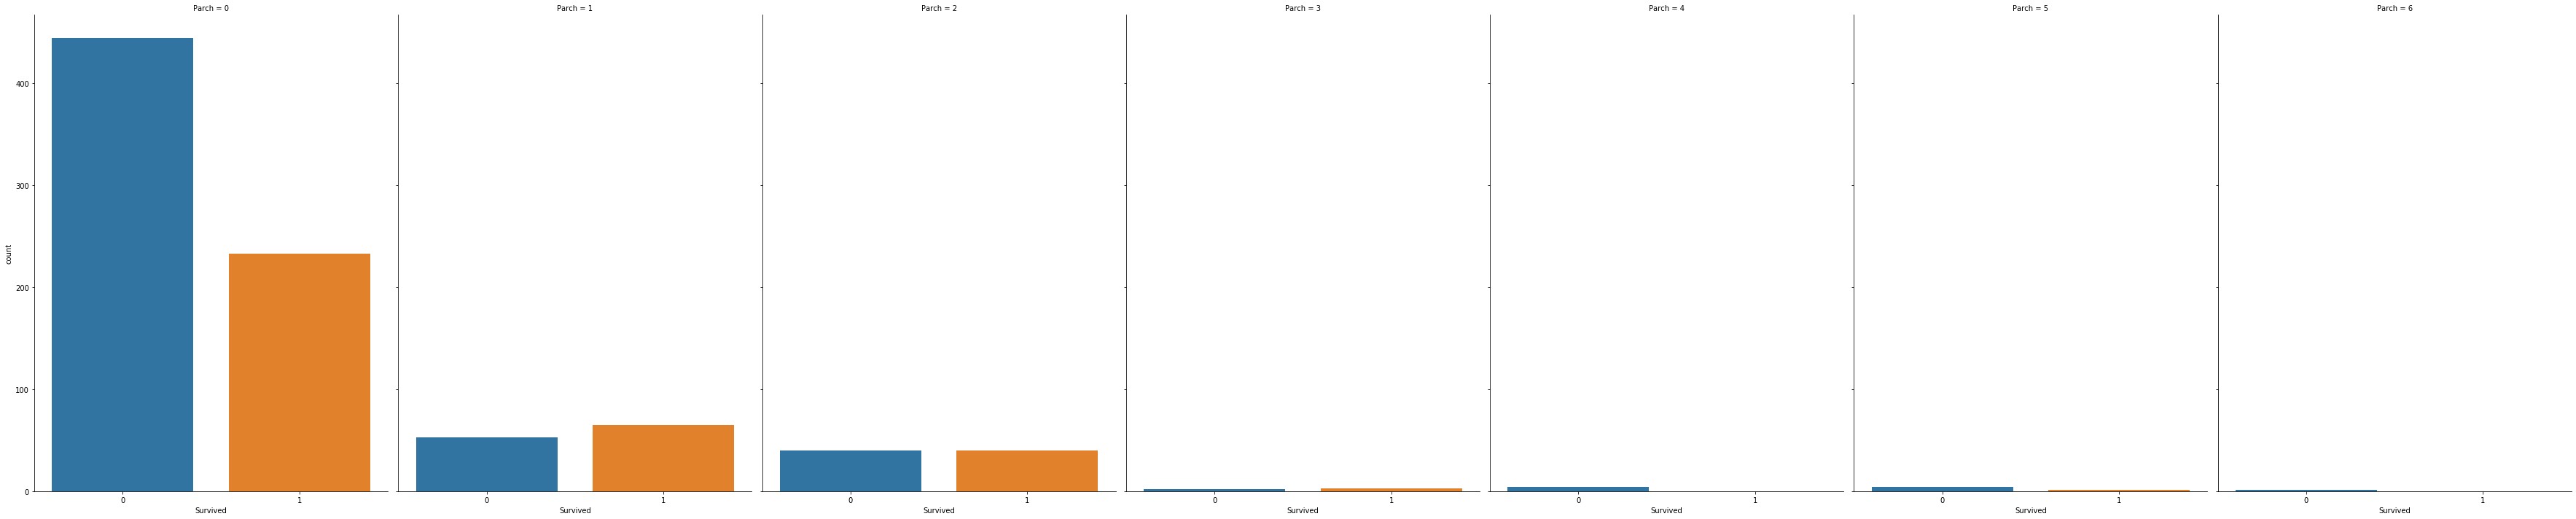

In [17]:
# Distribution of 'Parch'

g = sns.catplot(x="Survived", col="Parch",
                data=df_titanic, kind="count",
                height=10, aspect=0.7)

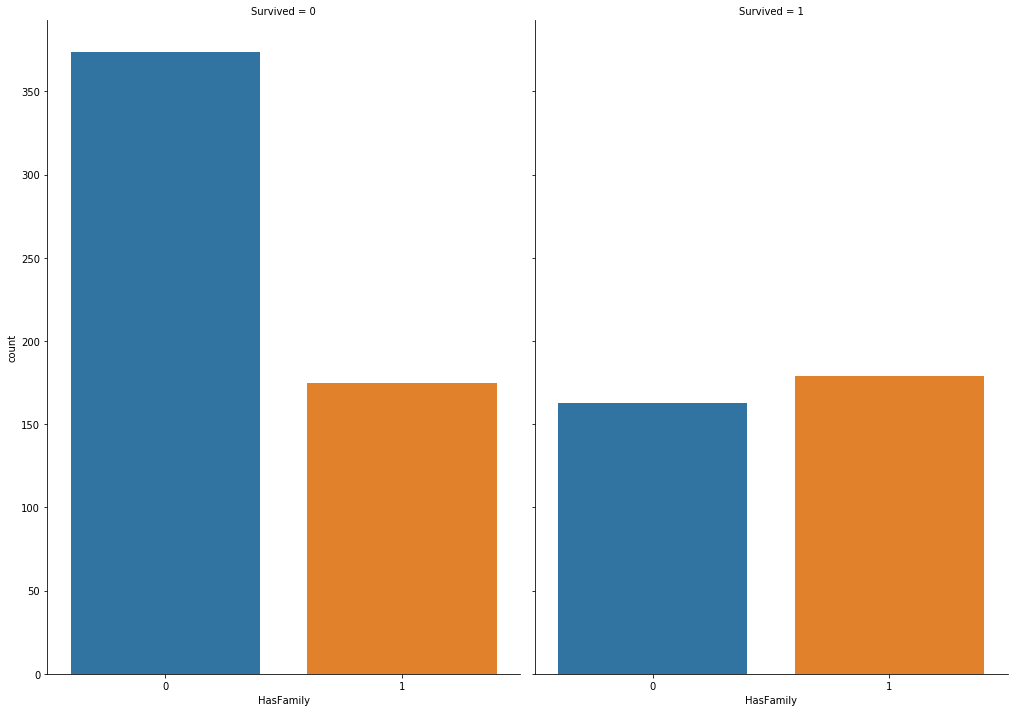

In [18]:
# Let's see with Number of "Family members" and "Has Family" status

g = sns.catplot(x="HasFamily", col="Survived",
                data=df_titanic, kind="count",
                height=10, aspect=0.7)

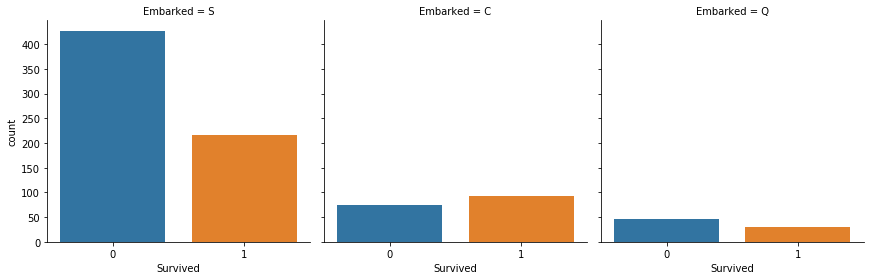

In [19]:
# Distribution of 'Embarked'

g = sns.catplot(x="Survived", col="Embarked",
                data=df_titanic, kind="count",
                height=4, aspect=1)

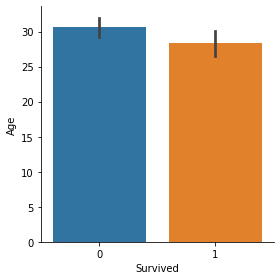

In [20]:
# Distribution of 'Age'

g = sns.catplot(x="Survived", y='Age',
                data=df_titanic, kind="bar", estimator=np.mean,
                height=4, aspect=1)

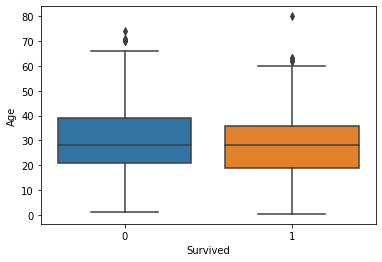

In [21]:
# Distribution of 'Age'

sns.boxplot(x='Survived', y='Age', data=df_titanic)

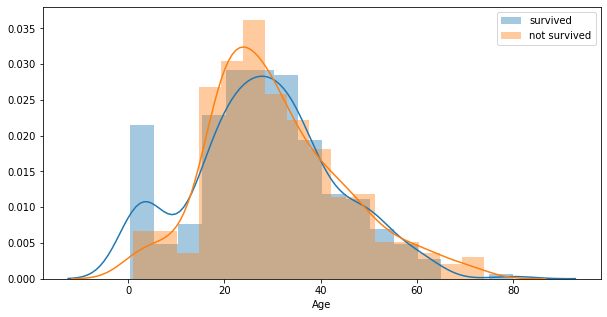

In [22]:
# Distribution of 'Age'

plt.figure(figsize=(10,5))

survived = df_titanic[df_titanic['Survived']==1]
not_survived = df_titanic[df_titanic['Survived']==0]
sns.distplot(survived['Age'], label='survived')
sns.distplot(not_survived['Age'], label='not survived')
plt.legend()

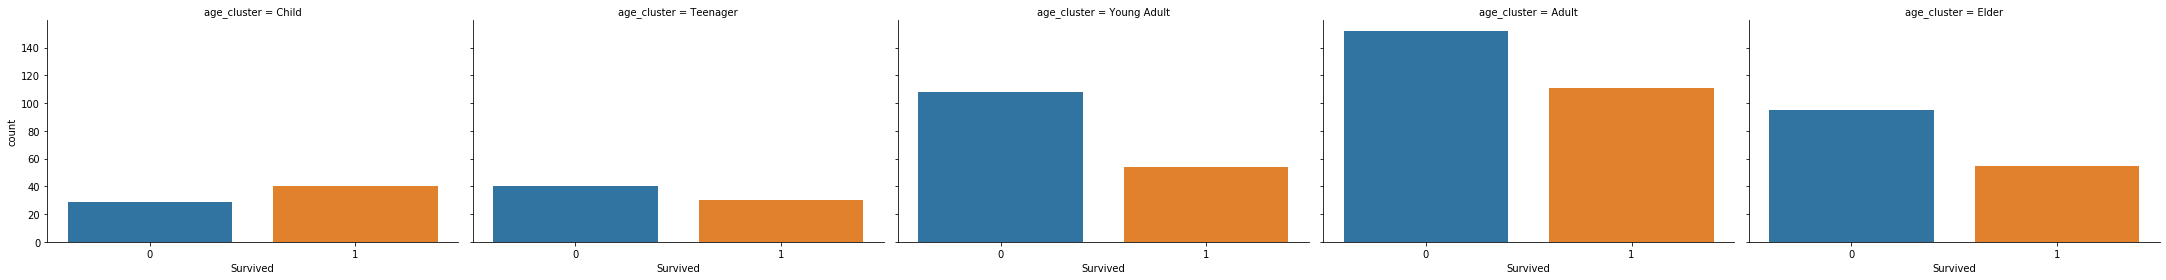

In [23]:
# Distribution of Age Group

g = sns.catplot(x="Survived", col='age_cluster',
                data=df_titanic, kind="count", estimator=np.mean,
                height=4, aspect=1.5)

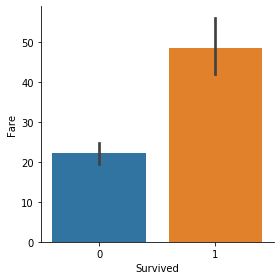

In [24]:
# Distribution of 'Fare'

g = sns.catplot(x="Survived", y='Fare',
                data=df_titanic, kind="bar", estimator=np.mean,
                height=4, aspect=1)

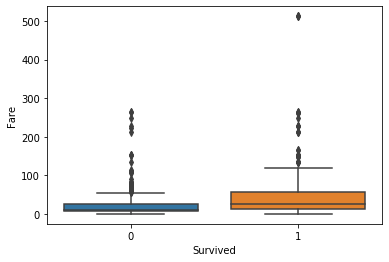

In [25]:
# Distribution of 'Fare'

sns.boxplot(x='Survived', y='Fare', data=df_titanic)

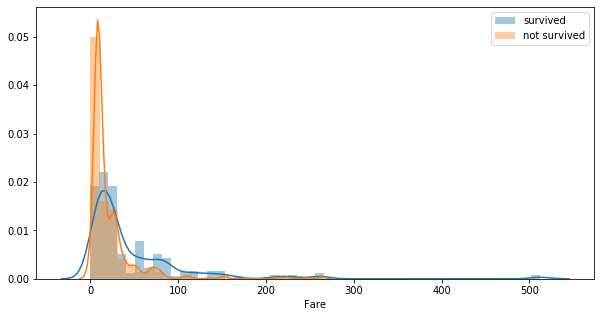

In [28]:
plt.figure(figsize=(10,5))

survived = df_titanic[df_titanic['Survived']==1]
not_survived = df_titanic[df_titanic['Survived']==0]
sns.distplot(survived['Fare'], label='survived', bins = 50)
sns.distplot(not_survived['Fare'], label='not survived', bins = 25)
plt.legend()

In [29]:
# Descriptive Statistics from Age and Fare

df_titanic[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


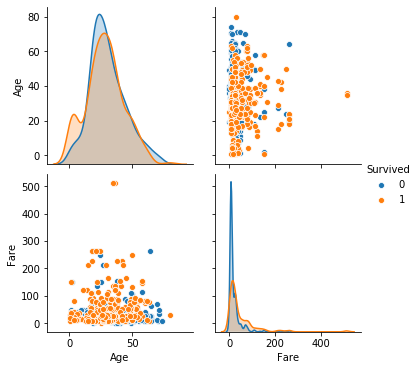

In [30]:
sns.pairplot(df_titanic[['Age','Fare','Survived']], hue='Survived')
plt.show()

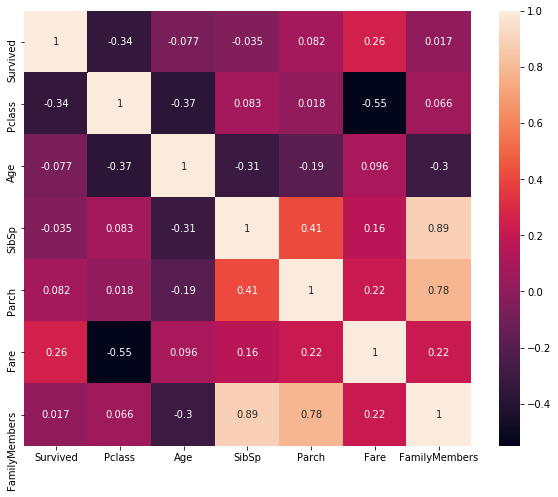

In [31]:
# Correlation Plot

plt.figure(figsize=(10,8))

columns =['Survived','Pclass','Age','SibSp','Parch','Fare','Sex','FamilyMembers']

sns.heatmap(data=df_titanic[columns].corr(), annot=True)
plt.show()

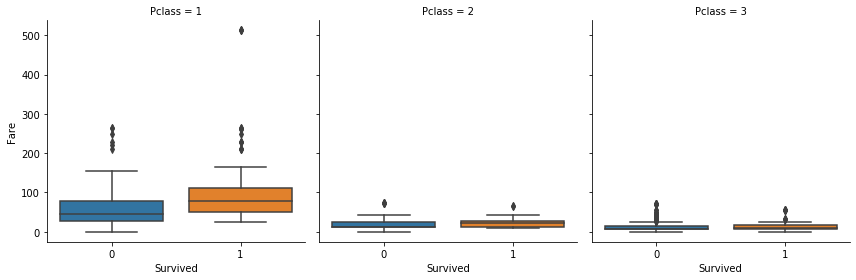

In [32]:
# Let's see Survived, Pclass and Fare

g = sns.catplot(x="Survived", y = 'Fare', col = 'Pclass',
                data=df_titanic, kind="box",
                height=4, aspect=1)

# At Pclass 1, passangers with higher Fare are more likely to be survived. 
# However, there are no significance difference in Pclass 2 and 3

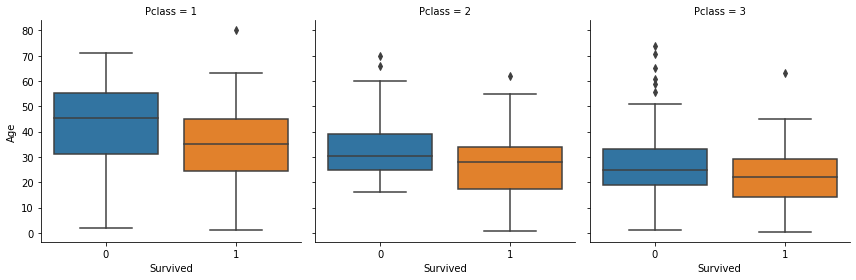

In [33]:
# Let's see Survived, Pclass and Age

g = sns.catplot(x="Survived", y = 'Age', col = 'Pclass',
                data=df_titanic, kind="box",
                height=4, aspect=1)

For further analysis, classification methods will be usefull to describe/predict survived and no survived passengers using the most influential variable. Thanks!